In [1]:
StateData2018<-read.csv("data/StateData2018.csv")

In [49]:
head(StateData2018)

,State,fipsCode,CensusRegion,CensusDivision,Population,PopChange2010_18,PerPopChange2010_18,InternMigration,InternMigRate,DomMigration,⋯,AAVotedPercent,LatinxVotedPercent,InfantMortalityRate,LifeExpectancy,HealthExpPerCapita,PercentUninsured,LifeSatis,Conservative,Religious,MedHHInc
,<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Alabama,1,South,EastSouthCentral,4887871,107733,2.254,3344,0.68,5718,⋯,49.6,29.1,9.03,75.0,7281,12.0,51.42162,26.00835,32.03850,48.486
2,Alaska,2,West,Pacific,737438,27189,3.828,2401,3.26,-10752,⋯,NA,NA,5.17,77.8,11064,14.3,52.08266,19.27924,24.12306,76.715
3,Arizona,4,West,Mountain,7171646,779358,12.192,14335,2.00,83240,⋯,50.9,48.8,5.32,79.2,6452,12.7,51.38469,20.40239,26.40519,56.213
4,Arkansas,5,South,WestSouthCentral,3013825,97797,3.354,2260,0.75,2475,⋯,41.6,20.8,8.20,75.5,7408,9.8,52.34836,25.04501,30.05092,45.726
5,California,6,West,Pacific,39557045,2302522,6.181,117797,2.98,-156068,⋯,49.9,43.3,4.22,81.0,7549,8.3,51.49240,17.61913,24.76924,71.228
6,Colorado,8,West,Mountain,5695564,666248,13.247,8207,1.44,43293,⋯,31.0,43.9,4.76,80.0,6804,8.6,52.87864,18.76129,24.94406,68.811


In [33]:
library(psych)

In [35]:
sub.corr <- StateData2018[c("ViolentCrimeRate", "PerChildPoverty", "MedHHIncome")] 
# create a subset of the data 
corr.test(sub.corr) # request the correlation matrix using psych's corr.test function

Call:corr.test(x = sub.corr)
Correlation matrix 
                 ViolentCrimeRate PerChildPoverty MedHHIncome
ViolentCrimeRate             1.00            0.49       -0.21
PerChildPoverty              0.49            1.00       -0.76
MedHHIncome                 -0.21           -0.76        1.00
Sample Size 
[1] 50
Probability values (Entries above the diagonal are adjusted for multiple tests.) 
                 ViolentCrimeRate PerChildPoverty MedHHIncome
ViolentCrimeRate             0.00               0        0.15
PerChildPoverty              0.00               0        0.00
MedHHIncome                  0.15               0        0.00

 To see confidence intervals of the correlations, print with the short=FALSE option

In [36]:
formula2<-ViolentCrimeRate ~ PerChildPoverty
model2 <- lm(formula2, data=StateData2018) 
summary(model2)
confint(model2)


Call:
lm(formula = formula2, data = StateData2018)

Residuals:
    Min      1Q  Median      3Q     Max 
-217.12  -59.48   -9.75   43.76  340.20 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      122.244     59.556   2.053 0.045587 *  
PerChildPoverty   13.335      3.406   3.915 0.000285 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 113.3 on 48 degrees of freedom
Multiple R-squared:  0.242,	Adjusted R-squared:  0.2262 
F-statistic: 15.33 on 1 and 48 DF,  p-value: 0.000285


,2.5 %,97.5 %
(Intercept),2.498222,241.98986
PerChildPoverty,6.486486,20.18358


In [41]:
StateData2018$MedHHInc <- StateData2018$MedHHIncome/1000 
# transform its measurement scale to $1,000s
formula3<- ViolentCrimeRate ~ PerChildPoverty + MedHHInc
model3 <- lm(formula3, data=StateData2018) 
summary(model3 )
confint(model3 )


Call:
lm(formula = formula3, data = StateData2018)

Residuals:
     Min       1Q   Median       3Q      Max 
-221.401  -73.380   -5.251   59.673  298.651 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -310.566    217.913  -1.425 0.160712    
PerChildPoverty   21.180      5.038   4.204 0.000116 ***
MedHHInc           4.991      2.423   2.060 0.045008 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 109.7 on 47 degrees of freedom
Multiple R-squared:  0.3048,	Adjusted R-squared:  0.2752 
F-statistic:  10.3 on 2 and 47 DF,  p-value: 0.000195


,2.5 %,97.5 %
(Intercept),-748.9502651,127.818623
PerChildPoverty,11.0455861,31.313944
MedHHInc,0.1157745,9.865769


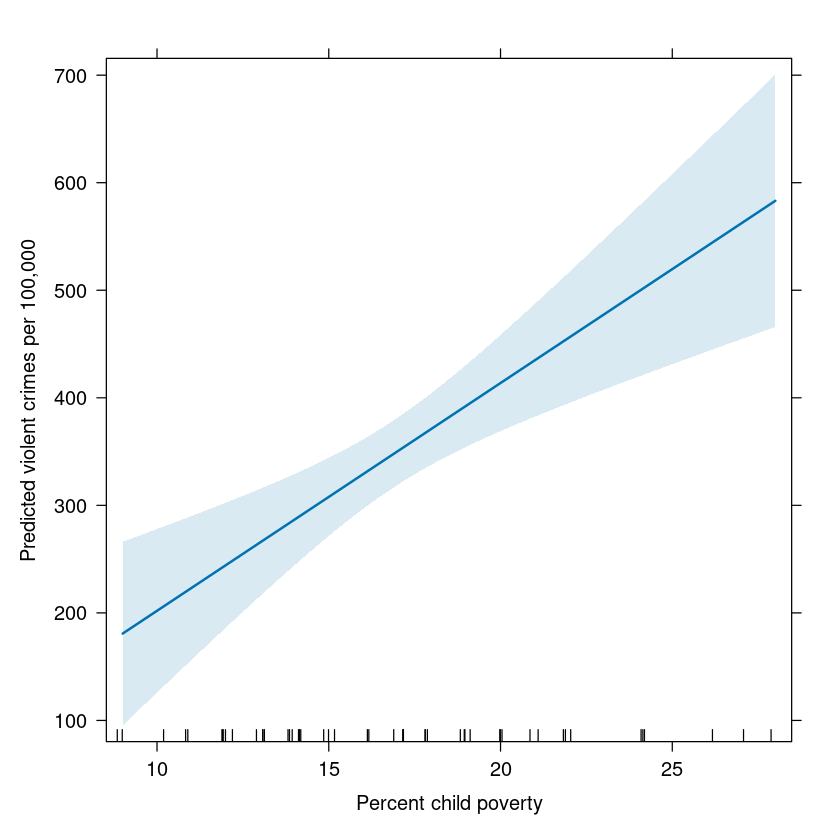

In [42]:
library(effects) 
plot(predictorEffect("PerChildPoverty", model3, xlevels=60), main="", xlab="Percent child poverty", ylab="Predicted violent crimes per 100,000")
# set median household income at its approximate mean of 60 (xlevels=60)

In [43]:
formula_null <- ViolentCrimeRate ~ 1

In [45]:
model_null <- lm(formula_null, data=StateData2018)

In [47]:
cat(AIC(model_null),AIC(model2),AIC(model3))

630.7247 618.8692 616.5489